In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv('dataset2.csv')
df.head(10)

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890
5,F,57,1.604690,79.076932
6,F,56,1.600986,98.521654
7,F,67,1.602997,52.798438
8,F,16,1.657872,88.473695
9,M,37,1.914266,132.305075


In [ ]:
df.info

<bound method DataFrame.info of          sex  age    height      weight
0          M   62  1.874021  114.384199
1          F   44  1.672676   76.031332
2          F   49  1.587970   46.403086
3          F   25  1.653451  104.352744
4          M   65  1.744867   76.831890
...      ...  ...       ...         ...
9995       M   68  1.999051  135.605141
9996  female   33  1.601821  141.973080
9997       M   25  1.926656  131.105269
9998       F   32  1.844436   62.475271
9999       M   61  1.958910  136.539595

[10000 rows x 4 columns]>

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,42.171700,16.425919,14.000000,28.000000,42.000000,57.000000,70.000000
height,10000.0,1.708993,0.099272,1.376462,1.636008,1.702588,1.776343,2.054139
weight,10000.0,88.910496,33.328269,17.970189,69.394196,83.518259,99.050654,335.295817


Deixar a altura e o peso com apenas duas casas decimais, a visualização dos dados será melhor, sem haver grande perde de dados, já que mais de 2 casas decimais nas duas medidas não é muito significado.

In [ ]:
df['weight']=df['weight'].round(2)
df['weight']

0       114.38
1        76.03
2        46.40
3       104.35
4        76.83
         ...  
9995    135.61
9996    141.97
9997    131.11
9998     62.48
9999    136.54
Name: weight, Length: 10000, dtype: float64

In [ ]:
df['height']=df['height'].round(2)
df['height']

0       1.87
1       1.67
2       1.59
3       1.65
4       1.74
        ... 
9995    2.00
9996    1.60
9997    1.93
9998    1.84
9999    1.96
Name: height, Length: 10000, dtype: float64

In [ ]:
df.head()

,sex,age,height,weight
0,male,62,1.87,114.38
1,female,44,1.67,76.03
2,female,49,1.59,46.40
3,female,25,1.65,104.35
4,male,65,1.74,76.83


# Ex A:

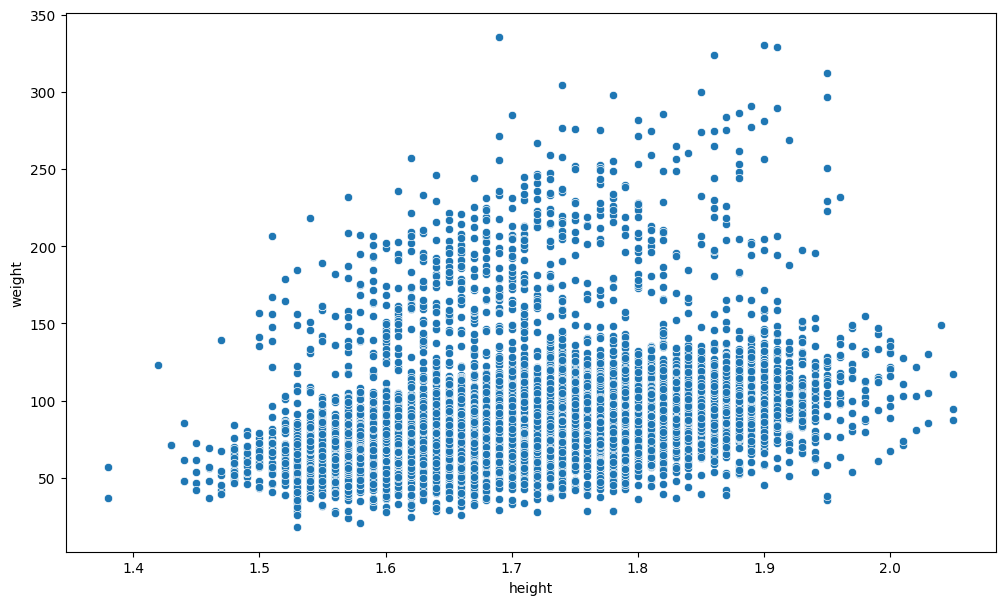

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='height', y='weight', data=df)
plt.show()

Os dados parecem estar em barras separadas pelo arredondamento feito, porém isso não altera seus resultados ou análises. Há uma clara concentração na região entre 1.5m e 1.9m. Há uma leve relação linear e diretamente proporcional entre as medidas, porém a variação de peso numa certa altura é bem variável, algo que faz essa relação linear não se mostrar tão nitidamente. Alturas acimas de 2m e pesos acima de 300kg se mostraram bem raros, e altura abaixo de 1.4m quase inexistentes.

Ver melhor essa questão, responder as perguntas, explorar melhor o gráfico. (ver gráfico sem arredondar e arredondando)

#Ex B


In [ ]:
df['sex'].unique()

array(['M', 'F', 'male', 'female'], dtype=object)

Homogenezar os dados, transformando 'M' em 'male' e 'F' em 'female':

In [ ]:
df["sex"].replace("M", "male", inplace=True)
df["sex"].replace("F", "female", inplace=True)
df['sex'].head(10)

0      male
1    female
2    female
3    female
4      male
5    female
6    female
7    female
8    female
9      male
Name: sex, dtype: object

#Ex C

In [ ]:
df['IMC']=df['weight']/(df['height']*df['height'])
df.head()

,sex,age,height,weight,IMC
0,male,62,1.87,114.38,32.708971
1,female,44,1.67,76.03,27.261644
2,female,49,1.59,46.40,18.353704
3,female,25,1.65,104.35,38.328742
4,male,65,1.74,76.83,25.376536


In [ ]:
df['IMC']=df['IMC'].round(2)
df['IMC'].head()

0    32.71
1    27.26
2    18.35
3    38.33
4    25.38
Name: IMC, dtype: float64

#Ex D:

Outliers são valores atípicos dentro de um conjunto de dados, ou seja, valores muito acima ou muito abaixo da média geral de uma certa fetuare do dataset. Eles podem causar problemas na análise e influenciar negativamente na criação de um modelo.

Outliers univariados:
Ele é considerado univariado quando se observa apenas uma característica para cada objeto do dataset, por exemplo no dataset utilizado aqui, dado um indivíduo com a altura de mais de 2.25m ele seria claramente um outlier univariado da feature de altura, assim como um indivíduo com 15kg seria um outlier univariado da feature de peso.

Outliers multivariados:
Um outlier é considerado multivariado quando se observa seu comportamente atípico a partir de mais de uma feature, por exemplo nesse dataset, uma pessoa de 150 kg não é necessariamente um outlier, porém se ela tem 150 kg e 1.4m seria claramente um.

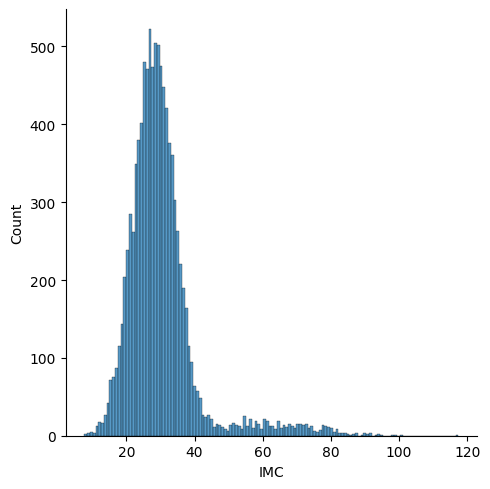

In [ ]:
sns.displot(x = df['IMC'])
plt.show()

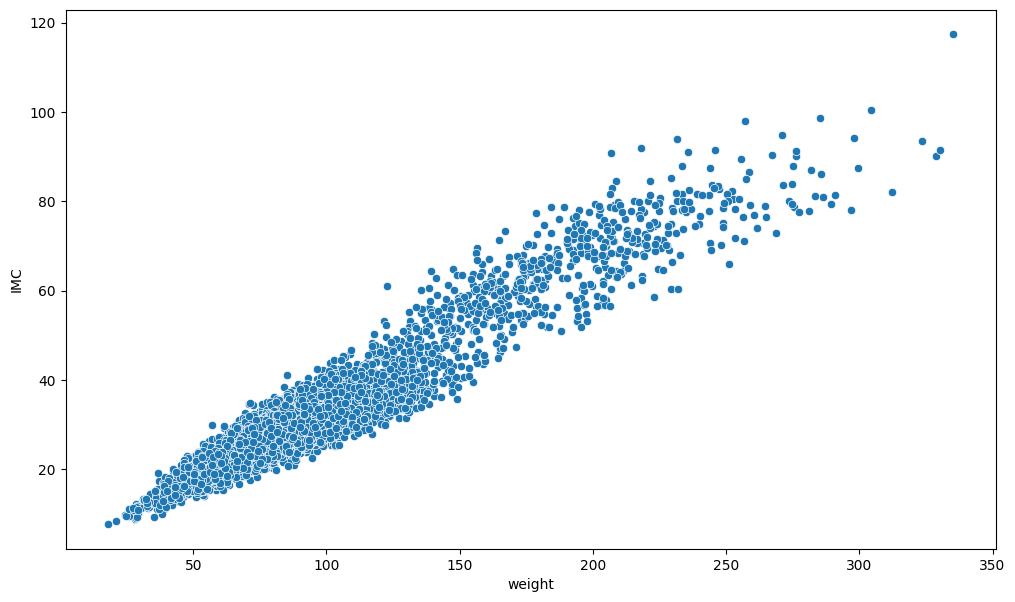

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='weight', y='IMC', data=df)
plt.show()

In [ ]:
df['IMC'].describe()

count    10000.000000
mean        30.351789
std         10.827578
min          7.680000
25%         24.407500
50%         28.650000
75%         33.250000
max        117.400000
Name: IMC, dtype: float64

In [ ]:
df['height'].describe()

count    10000.000000
mean         1.708963
std          0.099270
min          1.380000
25%          1.640000
50%          1.700000
75%          1.780000
max          2.050000
Name: height, dtype: float64

O IMC foi escolhido como feature a ser usada para reconhecer os outliers, ele, por ser uma medida baseada em duas outras features, peso e altura, seus outliers são multivariados

Partindo do pressusposto que a partir de um IMC > 40 a pessoa já é considerada em estado de obsidade morbida, usarei do dobro, IMC = 80,como um limiar para ser considerado outlier por ser um valor "exagerado", já para pesos muito pequenos usarei um IMC = 12 como limiar, já que magreza é tido como IMC < 18,5 e um IMC muito mais baixo é mais raro que um muito mais alto, escolhi aproximadamente 2/3 como o limiar.

Já que sabemos que a altura máxima no dataset é 2.05, sendo uma feature sem valores fora do comum, escolheu-se arbritariamente uma pessoa com a altura média, 1.7m, para mostrar o 12 < IMC < 80 como um bom limiar. Nessa altura, para um IMC = 12 a pessoa teria que pesar 34,68kg, já para um IMC = 80 a pessoa teria que pesar 231,2kg, nos dois casos, pesos claramente atípicos.

In [ ]:
len(df[df['IMC']>80])

0

In [ ]:
len(df[df['IMC']<12])

0

Podemos ver que os números arbitrariamente escolhidos não representam uma quantidade grande dos dados, podendo retirá-las sem comprometer o dataset

In [ ]:
df= df[df['IMC']<80]
df=df[df['IMC']>12]
df['IMC']

0       32.71
1       27.26
2       18.35
3       38.33
4       25.38
        ...  
9995    33.90
9996    55.46
9997    35.20
9998    18.45
9999    35.54
Name: IMC, Length: 9913, dtype: float64

#Ex E:

In [ ]:
saudável = (df['IMC'] >= 18.5) & (df['IMC'] < 25)
df['IMC'][saudável].count()

2299

Se contarmos as 10000 pessoas do dataset original, temos aproximadamente 23% de indivíduos numa condição saudável segundo a tabela do IMC.

#Ex F:

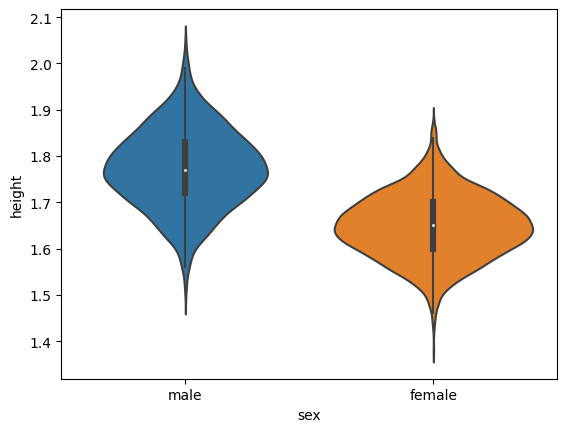

In [ ]:
sns.violinplot(x='sex', y='height', data=df)
plt.show()   #ver como posso melhorar e como analisar

É claro a diferença média de altura entre homens e mulheres, os homens tem uma média de altura consideravalmente maior que a das mulheres, além disso as pessoas com maiores altitudes são homens e com as menores são mulheres.

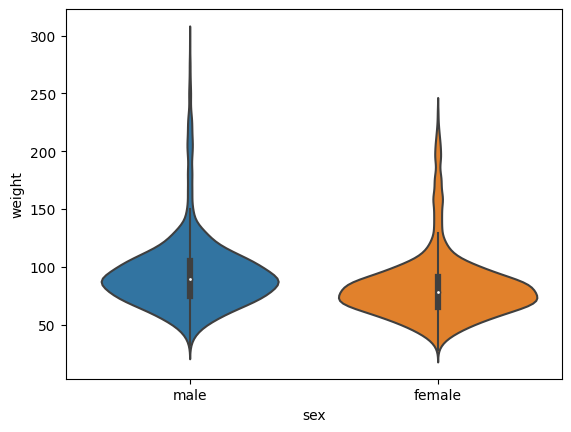

In [ ]:
sns.violinplot(x='sex', y='weight', data=df)
plt.show()

No peso a média segue um padrão parecido com a altura, nos homens é maior que nas mulheres, e também os indivíduos com maior peso são homens.